In [1]:
number = 42

42

In [2]:
function ∆(value, number)
    number - value
end

∆ (generic function with 1 method)

In [3]:
∆(12, 42)

30

In [4]:
rand(500).- 0.5

500-element Vector{Float64}:
  0.06930143548579948
 -0.4453447966602295
  0.2238863935810218
  0.06527353307628991
 -0.07690629158809181
  0.4841678385470598
  0.1485587858360755
 -0.15650181934510177
  0.21897659752295118
  0.13149355308805966
  0.08359860021564702
  0.007992858291700822
  0.13534897133026447
  ⋮
 -0.26070193483534143
 -0.2015525210880389
 -0.27147764476854097
 -0.2353078919196956
  0.488620045722149
 -0.08925082303147458
  0.11344237921053013
  0.39034143659801335
 -0.11701614021041395
  0.09990010557064499
 -0.31985048104736347
 -0.47306879666070745

In [5]:
function top_survivors(values, number, top_percent = 10)
    errors_and_values = [(abs(∆(value, number)), value) for value in values]
    sorted_errors_and_values = sort(errors_and_values)
    end_number = Int(length(values) * top_percent / 100)
    sorted_errors_and_values[1:end_number]
end

top_survivors (generic function with 2 methods)

In [6]:
survivors = top_survivors(rand(500).- 0.5, number)

50-element Vector{Tuple{Float64, Float64}}:
 (41.50028913914384, 0.4997108608561651)
 (41.50163764763039, 0.4983623523696128)
 (41.50229867252267, 0.49770132747733076)
 (41.50271735031414, 0.49728264968586045)
 (41.50426025100648, 0.49573974899352446)
 (41.50693128701499, 0.49306871298501)
 (41.511883048742554, 0.48811695125744703)
 (41.51325493398112, 0.48674506601887746)
 (41.520681780154675, 0.47931821984532696)
 (41.535789955329385, 0.4642100446706128)
 (41.53919619363259, 0.4608038063674118)
 (41.542570585117, 0.4574294148830005)
 (41.54393475389201, 0.45606524610798904)
 ⋮
 (41.601526722083726, 0.3984732779162745)
 (41.60213121484163, 0.39786878515837354)
 (41.60219978861028, 0.39780021138972144)
 (41.604518821704744, 0.39548117829525387)
 (41.60466075508257, 0.3953392449174302)
 (41.60657395878373, 0.3934260412162742)
 (41.60681568328638, 0.39318431671362064)
 (41.60699246277461, 0.39300753722538473)
 (41.607047791359484, 0.39295220864051306)
 (41.6071307991258, 0.39286920087420

In [7]:
function mutate(value, mutations = 10)
    [value + rand() - 0.5 for i in 1:mutations]
end

mutate (generic function with 2 methods)

In [8]:
mutate(50)

10-element Vector{Float64}:
 50.17092672439411
 50.26071861244803
 49.63101746865236
 49.88744504646273
 49.57670670423038
 50.28648679490848
 49.989766576457896
 50.078674267408424
 49.98043146438223
 49.751697608001386

In [9]:
vcat([1, 2, 3], [4, 5, 6])

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [10]:
function mutate_list(list, mutations = 10)
    output = []
    for element in list
        output = vcat(output, mutate(element, mutations))
    end
    output
end

mutate_list (generic function with 2 methods)

In [11]:
mutate_list((1, 2, 3, 4))

40-element Vector{Any}:
 1.336795443538346
 0.5928213695887528
 0.5448102289750487
 1.008681385175015
 1.3294869312861735
 1.173856324107879
 0.7291950060330235
 0.5457457342388241
 0.869996788516674
 1.441147040448583
 1.7570543867408244
 1.8501165635716847
 1.5324786096399161
 ⋮
 3.01014495501156
 3.412498970075438
 4.092523507733492
 4.246399219003582
 3.8039000151006253
 4.035431659267041
 4.043854868473105
 4.075111466809419
 4.142745769548758
 4.342285419033159
 4.404213623300171
 4.083039131817674

In [12]:
# let there be initial values
initial_values = rand(500)
survivors = initial_values
generations = 500
top_survivors_sample = []

for generation in 1:generations
    survivors = mutate_list(survivors)
    errors_and_values = top_survivors(survivors, number)
    survivors = [value for (error, value) in errors_and_values]
    push!(top_survivors_sample, survivors[1:10])
    
    if (generation == 1) || (generation % 10 == 0) 
        println(generation, " => ", survivors[1:5])
    end
end

1 => [1.4787787913916366, 1.452875282215277, 1.4299894316736284, 1.4272498562214535, 1.4259999105937304]
10 => [5.596997979912084, 5.582026217264721, 5.572144307414774, 5.570481220921604, 5.569330051362673]
20 => [10.162762819743328, 10.158311527582452, 10.156922092837787, 10.149557234894427, 10.14750317043092]
30 => [14.812691639848374, 14.77722315198652, 14.76672110128968, 14.755753392815715, 14.74630131996637]
40 => [19.50062454345918, 19.49814167599056, 19.494355143909313, 19.480919531293935, 19.48036974890701]
50 => [24.098374093185306, 24.089834112803548, 24.070328982067437, 24.05891069843412, 24.052683483557978]
60 => [28.700363795774127, 28.646504535607498, 28.644241233244344, 28.6441972190971, 28.640559383531546]
70 => [33.31800105755787, 33.30750925932183, 33.30424700663281, 33.27896770026518, 33.27120643512929]
80 => [37.94409862821613, 37.87583626399696, 37.8744125932401, 37.849113850428644, 37.83721128123797]
90 => [41.999930181447695, 41.999614029198774, 41.99935793216500

In [13]:
plotting_range = 1 : generations

1:500

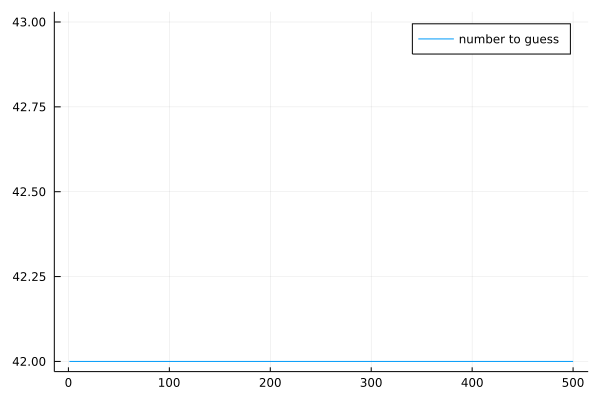

In [14]:
using Plots
progress_plot = plot(plotting_range, fill(number, generations), label = "number to guess")

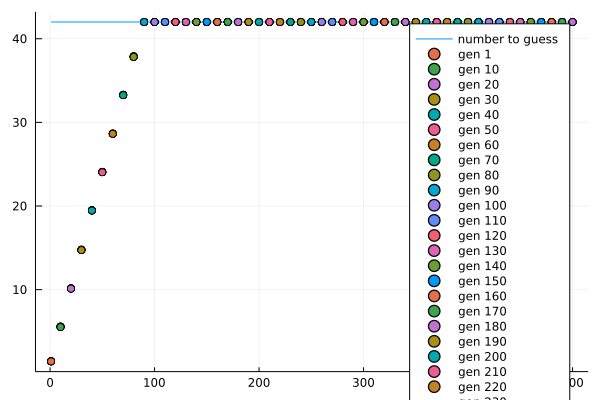

In [15]:
for i in plotting_range
    if (i == 1) || (i % 10 == 0)
        plot!(progress_plot, fill(i, 10), top_survivors_sample[i], label = "gen $i", seriestype = :scatter)
    end
end

progress_plot

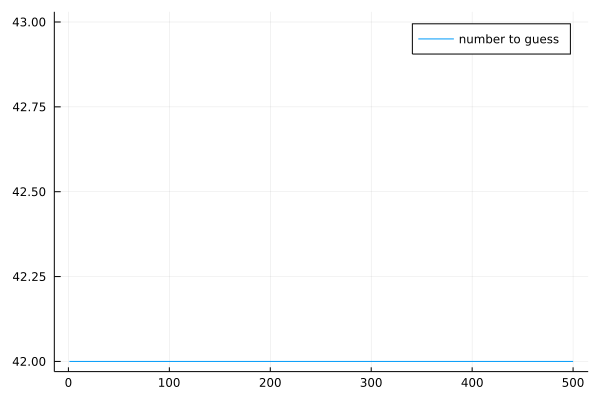

In [16]:
fine_grain_plot = plot(plotting_range, fill(number, generations), label = "number to guess")

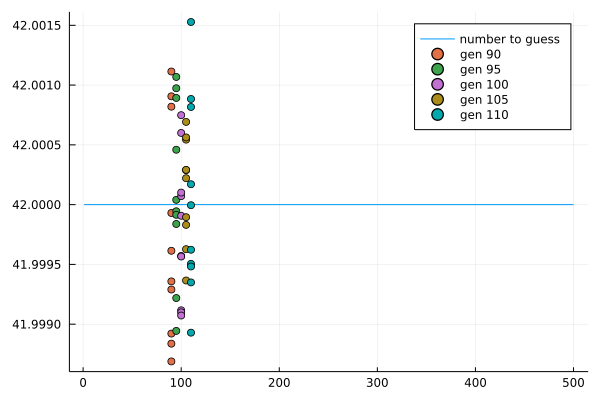

In [17]:
for i in 90:110
    if (i % 5 == 0)
        plot!(fine_grain_plot, fill(i, 10), top_survivors_sample[i], label = "gen $i", seriestype = :scatter)
    end
end

fine_grain_plot

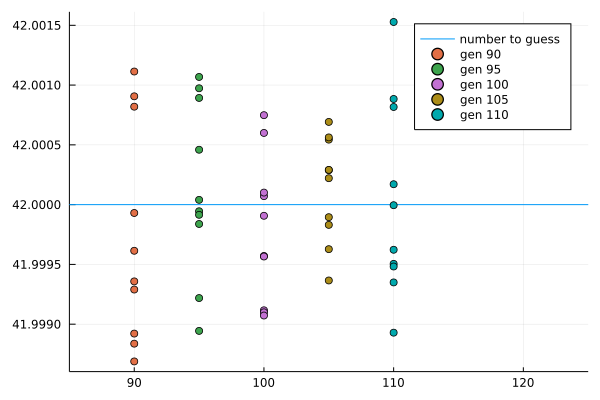

In [18]:
plot!(fine_grain_plot, xlims = (85, 125))